In [72]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import csv

file_path = r'/Users/ada.wang/Downloads/Project_dataset.csv' # Should we save the raw data in Google Drive?
df = pd.read_csv(file_path)
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [74]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [75]:
# Find missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) 


Income    24
dtype: int64


In [76]:
# Drop the rows with missing values
df.dropna(inplace=True)

In [77]:
# Check if there are duplicated values
duplicates = df.duplicated().sum()
print(duplicates)

0


In [78]:
# Marital_Status

# Dropping the rows that has Marital_Status == 'Absurd' OR  'YOLO'
df = df[df['Marital_Status'] != 'Absurd']
df = df[df['Marital_Status'] != 'YOLO']

#Making Sure All Rows where Marital_Status = 'Absurd'  or 'YOLO' are removed
print('No of Absurd = ',df[df['Marital_Status'] == 'Absurd']['Marital_Status'].count())
print('No of YOLO = ',df[df['Marital_Status'] == 'YOLO']['Marital_Status'].count())

# Revise the Marital_status
df['Marital_Status_revised'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'Together': 'Married'
    })

df['Marital_Status_revised'].unique()

No of Absurd =  0
No of YOLO =  0


array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

In [79]:
# Education
# Replace Graduation to Bachelor, and 2n Cycle to Master
df['Education_revised'] = df['Education'].replace({
    'Graduation': 'Bachelor',
    '2n Cycle': 'Master'
})
df['Education_revised'].unique()

array(['Bachelor', 'PhD', 'Master', 'Basic'], dtype=object)

In [80]:
# Age
# Add one column as Age
df['Age'] = 2014 - df['Year_Birth']
# Remove people age > 100
df = df[df['Age'] <= 100]


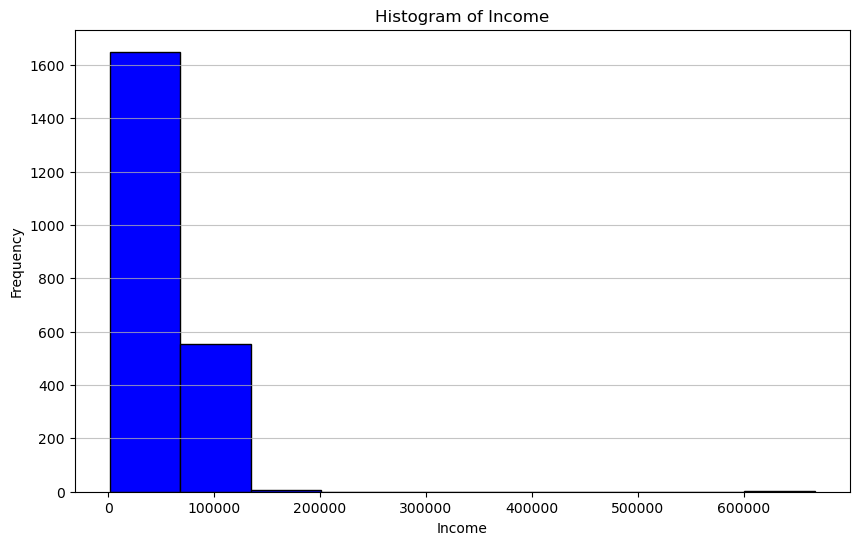

In [60]:
# Plot histogram for 'Income' column
plt.figure(figsize=(10, 6))
plt.hist(df['Income'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

We have ***outlier*** in the Income  ***coloumn***

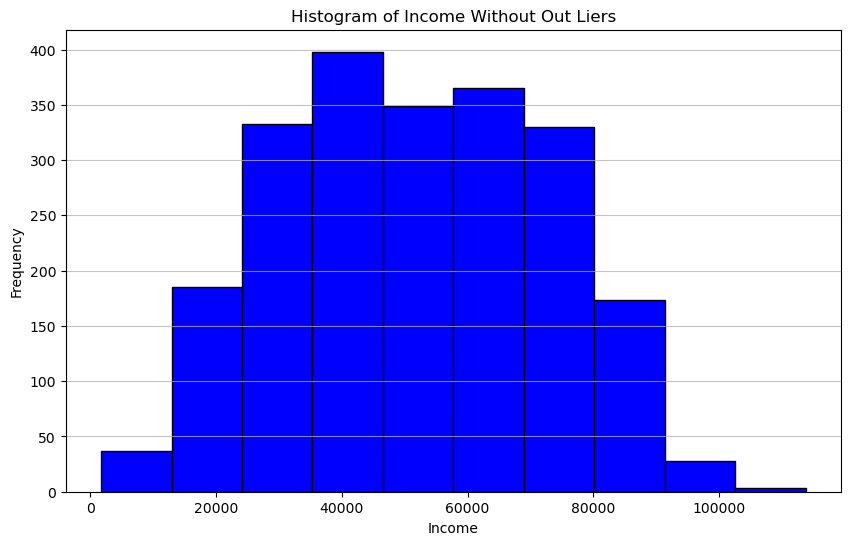

In [81]:
# Displaying the INCOME values that are 150,000   (ouliers to remove them)
df[df['Income'] >=150000]['Income'].head(20)

# updating the df dataframe by dropping rows when Income >= 150,000
df = df[df['Income'] <= 150000]

#Making sure there is no Income more than 150,000
df[df['Income'] >= 150000]['Income'].count()

# Plot the new histogram for 'Income' column After Removing Outliers
plt.figure(figsize=(10, 6))
plt.hist(df['Income'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Income Without Out Liers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [82]:
# Dropping 2 columns: 'Z_CostContact'   &    'Z_Revenue'
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_revised,Education_revised,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1,Single,Bachelor,57
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,0,Single,Bachelor,60
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,Married,Bachelor,49
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,0,Married,Bachelor,30
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,0,Married,PhD,33


In [83]:
# change the date format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [84]:
# Creating a new column in the df called 'Total Purchases' = 'NumWebPurchases' + 'NumStorePurchases' + 'NumStorePurchases'
df['Total Purchases'] = df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumCatalogPurchases']
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_revised,Education_revised,Age,Total Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,Single,Bachelor,57,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,Single,Bachelor,60,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,Married,Bachelor,49,20
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,Married,Bachelor,30,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,Married,PhD,33,14


•	We apply one-hot encoding to the Education and Marital_Status columns to convert categorical data into numerical format.

In [65]:
#Applying One-Hot Encoding on the categorical variables To Convert them into Numerical values
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=False)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,False,True,False,False,False,False,False,True,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,False,True,False,False,False,False,False,True,False,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,False,True,False,False,False,False,False,False,True,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,False,True,False,False,False,False,False,False,True,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,False,False,False,True,False,False,True,False,False,False
